In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.sparse import csr_matrix

In [3]:
!pip install scipy

In [0]:
# load data
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

valid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/validation.csv')


# Data exploration



---


*   **Basic statistical analysis**



---



In [0]:
dataset = {"training set":train,"validation set":valid}

In [0]:
print("Number of impressions:")  
for a,b in dataset.items():
    print(a, "=", len(b))
print("\nNumber of clicks:")    
for a,b in dataset.items():
    print(a, "=", len(b[b.click==1]))
print("\nCost:")        
for a,b in dataset.items():
    print(a, "=", (1/1000)*np.sum(b.payprice))
print("\nCTR:")    
for a,b in dataset.items():
    print(a, "=", len(b[b.click==1])/len(b))
print("\nAverage CPM:")    
for a,b in dataset.items():
    print(a, "=", np.mean(b.payprice))
print("\nCPC:")    
for a,b in dataset.items():
    print(a, "=", (1/1000)*np.sum(b.payprice)/len(b[b.click==1]))
    # divide by 1000

Number of impressions:
training set = 2430981
validation set = 303925

Number of clicks:
training set = 1793
validation set = 202

Cost:
training set = 189984.608
validation set = 23777.27

CTR:
training set = 0.0007375623256619447
validation set = 0.0006646376573167722

Average CPM:
training set = 78.15141623895867
validation set = 78.23400509994242

CPC:
training set = 105.95906748466258
validation set = 117.70925742574258




---



 **Number of distinct values in columns of training set**

In [0]:
# number of unique values in each column
train.T.apply(lambda x: x.nunique(), axis=1)

click                   2
weekday                 7
hour                   24
bidid             2430981
userid            2342677
useragent              38
IP                 503975
region                 35
city                  370
adexchange              4
domain              23012
url                763960
urlid                   0
slotid              52283
slotwidth              21
slotheight             14
slotvisibility         11
slotformat              4
slotprice             286
creative              131
bidprice                8
payprice              301
keypage                18
advertiser              9
usertag            744035
dtype: int64



---



*   **Feature overview**


---






 **CTR estimation for some features**






> **CTR per weekday**



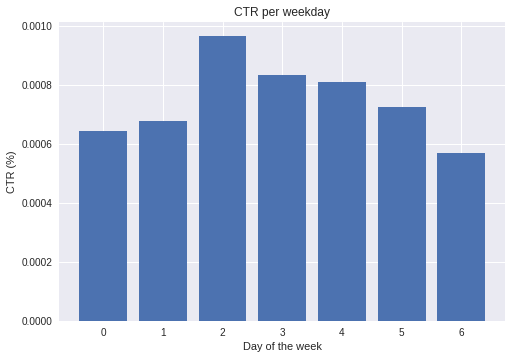

In [7]:
# empty list for ctr
ctr_week = []
# loop for ctr estimation
for name in sorted(train.weekday.unique()):
    ctr_week.append(len(train.loc[(train.click==1) & (train.weekday==name)])/len(train.loc[train.weekday==name]))

# plot for ctr    
plt.bar(np.arange(len(train.weekday.unique())), ctr_week, tick_label=sorted(train.weekday.unique().tolist()), align='center')
plt.title('CTR per weekday')
plt.ylabel('CTR (%)')
plt.xlabel('Day of the week')
plt.show()



> **CTR per hour**



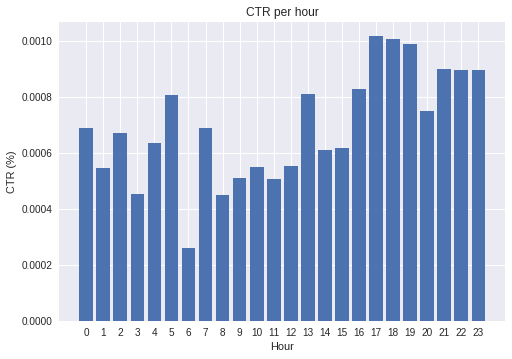

In [6]:
ctr_hr = []
for name in sorted(train.hour.unique()):
    ctr_hr.append(len(train.loc[(train.click==1) & (train.hour==name)])/len(train.loc[train.hour==name]))


plt.bar(np.arange(1,25), ctr_hr, tick_label=sorted(train.hour.unique().tolist()), align='center')
plt.title('CTR per hour')
plt.ylabel('CTR (%)')
plt.xlabel('Hour')
plt.show()



> **CTR per advertiser**



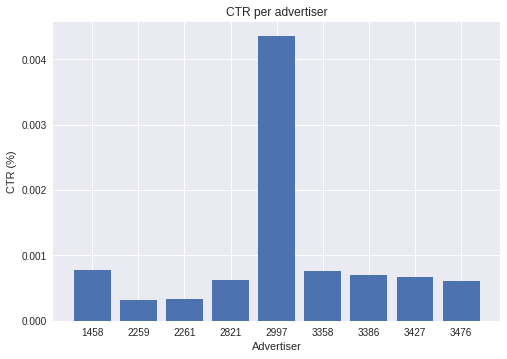

In [5]:
ctr_adv = []
for name in sorted(train.advertiser.unique()):
    ctr_adv.append(len(train.loc[(train.click==1) & (train.advertiser==name)])/len(train.loc[train.advertiser==name]))


plt.bar(np.arange(len(train.advertiser.unique())), ctr_adv, tick_label=sorted(train.advertiser.unique().tolist()), align='center')
plt.title('CTR per advertiser')
plt.ylabel('CTR (%)')
plt.xlabel('Advertiser')
plt.show()



---



**Additional metrics for advertisers, bidprices and regions**




In [0]:
# analyse the feature
def analyse_feature(data, field):
    # number of impressions
    df = pd.DataFrame({'impressions': data.groupby(field).size()}).reset_index() 
    # number of clicks
    df = df.join(pd.DataFrame({'clicks': data.groupby(field)['click'].sum()}).reset_index(drop=True))
    df = df.fillna(0)
    
    return df

In [0]:
# plot graph for analysed feature
def plot_graph(feature, xcol, ycol, xlabel, ylabel, title):
    x = np.arange(len(feature)) 
    plt.bar(x, feature[ycol], align='center')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(x, feature[xcol])
    plt.show()



> **Advertisers**



In [0]:
advertiser_features = analyse_feature(train, 'advertiser')

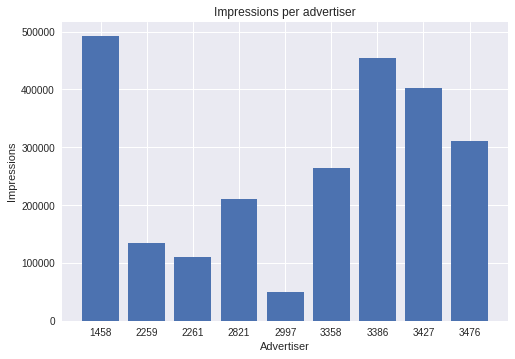

In [0]:
plot_graph(advertiser_features, 'advertiser', 'impressions', 'Advertiser', 'Impressions', 'Impressions per advertiser')

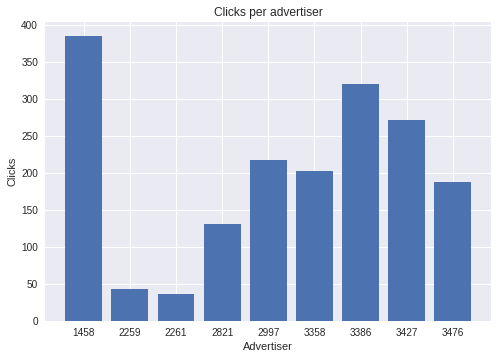

In [0]:
plot_graph(advertiser_features, 'advertiser', 'clicks', 'Advertiser', 'Clicks', 'Clicks per advertiser')

> **Bidprices**

In [0]:
bidprice_features = analyse_feature(train, 'bidprice')

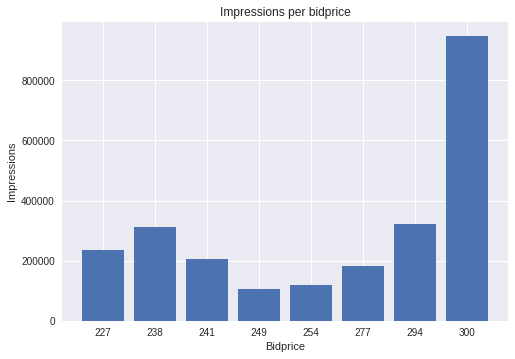

In [0]:
plot_graph(bidprice_features, 'bidprice', 'impressions', 'Bidprice', 'Impressions', 'Impressions per bidprice')

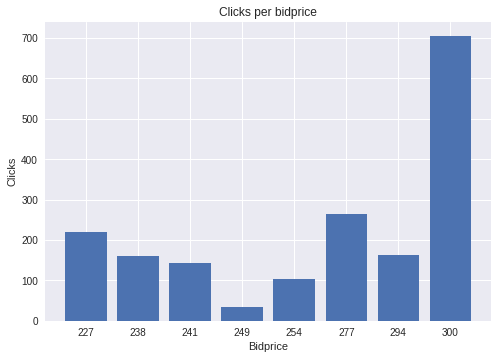

In [0]:
plot_graph(bidprice_features, 'bidprice', 'clicks', 'Bidprice', 'Clicks', 'Clicks per bidprice')

> **Regions**

In [0]:
region_features = analyse_feature(train, 'region')

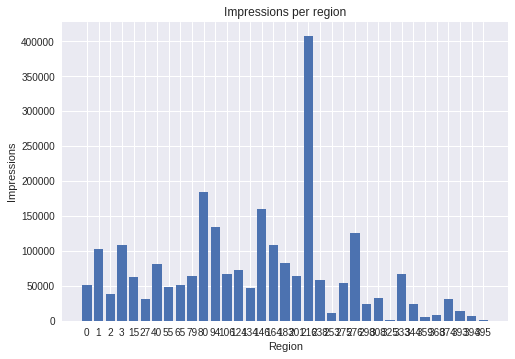

In [0]:
plot_graph(region_features, 'region', 'impressions', 'Region', 'Impressions', 'Impressions per region')

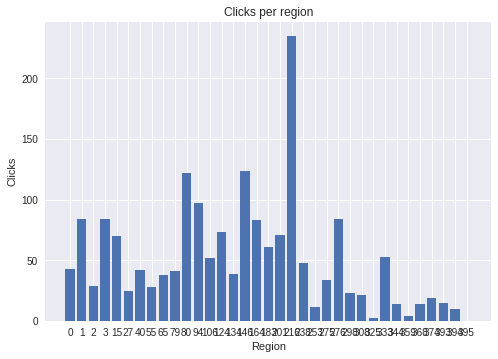

In [0]:
plot_graph(region_features, 'region', 'clicks', 'Region', 'Clicks', 'Clicks per region')